#### 📊 Análisis de Temperaturas en Diferentes Ciudades de México  

### 📝 Tarea de Estadística Multivariada  
**Profesora: Rocío Leonel Gómez**  

---

### 🌍 Introducción  
El cambio climático ha generado **variaciones significativas** en las temperaturas de diversas ciudades de México con datos aleatorios.  

En este ejercicio, los estudiantes analizarán las **temperaturas promedio** de distintas ciudades durante los últimos cinco años.  

Para ello, se utilizarán:  
✔️ Un **mapa de calor** para visualizar las variaciones anuales.  
✔️ Un **gráfico estrella** para comparar las temperaturas entre ciudades en un año específico.  


In [18]:
# Librerías
if (!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse, showtext, fmsb, ggplot2, scales)

#Fuente para los gráficos
font_add_google("Montserrat", "montserrat")
showtext_auto()

In [9]:
# Definir el tamaño de la visualización en Jupyter Notebook o RStudio
options(repr.plot.width = 14, repr.plot.height = 6)  # 🔹 Ajusta el tamaño del gráfico en la visualización

In [8]:
# Definir los datos:

datos <- data.frame(
  Años = c(2019, 2020, 2021, 2022, 2023),
  CDMX = c(17.5, 18.0, 18.2, 18.5, 18.7),
  Guadalajara = c(21.0, 21.3, 21.5, 21.8, 22.0),
  Monterrey = c(23.5, 24.0, 24.2, 24.5, 24.8),
  Cancún = c(27.0, 27.2, 27.5, 27.7,28),
  Tijuana = c(16.5, 16.8, 17.0, 17.2, 17.5)
)
datos

Años,CDMX,Guadalajara,Monterrey,Cancún,Tijuana
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019,17.5,21.0,23.5,27.0,16.5
2020,18.0,21.3,24.0,27.2,16.8
2021,18.2,21.5,24.2,27.5,17.0
2022,18.5,21.8,24.5,27.7,17.2
2023,18.7,22.0,24.8,28.0,17.5


#### 📌 Instrucciones  

#### 🔥 **1. Mapa de Calor**  
- Utilizar un software de análisis de datos como **Excel, Python, R** u otra herramienta para representar las temperaturas en un mapa de calor.  
- Identificar los **patrones de variación de temperatura** entre los diferentes años y ciudades.  

#### ❓ **Preguntas de Análisis**  
📍 ¿Cuál es la **ciudad con mayor incremento** de temperatura?  
📍 ¿Se observa una **tendencia de calentamiento** en alguna ciudad?  


In [10]:
# Transformar los datos al formato largo
datos_l <- datos %>%
  pivot_longer(cols = -Años, names_to = "Ciudad", values_to = "Temperatura")
datos_l

Años,Ciudad,Temperatura
<dbl>,<chr>,<dbl>
2019,CDMX,17.5
2019,Guadalajara,21.0
2019,Monterrey,23.5
2019,Cancún,27.0
2019,Tijuana,16.5
2020,CDMX,18.0
2020,Guadalajara,21.3
2020,Monterrey,24.0
2020,Cancún,27.2


In [36]:
# Crear el mapa de calor con degradado en tonos rosas
mapa_calor <- datos_l %>%
  ggplot(aes(x = Años, y = Ciudad, fill = Temperatura)) +
  geom_tile(color = "white", size = 0.5) +  # Borde blanco entre celdas
  scale_fill_gradientn(colors = c("#fde0ef", "#f7a6d2", "#f06292", "#e91e63", "#880e4f")) +  # 🔹 Degradado en tonos rosas
  geom_text(aes(label = round(Temperatura, 1)), size = 6, color = "black") +  # Mostrar valores en celdas
  labs(
    title = "Tabla 2. Temperaturas promedio por mes y año",
    subtitle = "(En grados Celsius)",
    x = "Año",
    y = "Ciudad",
    fill = "Temperatura (°C)"
  ) +
  theme_minimal() +
  theme(
    text = element_text(family = "montserrat"),  # Aplicar Montserrat
    plot.title = element_text(size = 22, face = "bold", hjust = 0.5),  # Título centrado
    plot.subtitle = element_text(size = 18, hjust = 0.5),  # Subtítulo centrado
    axis.title = element_text(size = 18),  # Tamaño de títulos de ejes
    axis.text = element_text(size = 14),  # Tamaño de etiquetas de ejes
    legend.position = "bottom",  # Ubicar la leyenda en la parte inferior
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14)
  )

[1] "📍 La ciudad con mayor incremento de temperatura es: Cancún"
[1] "📍 ¿Se observa una tendencia de calentamiento? Sí, se observa un aumento gradual en todas las ciudades."


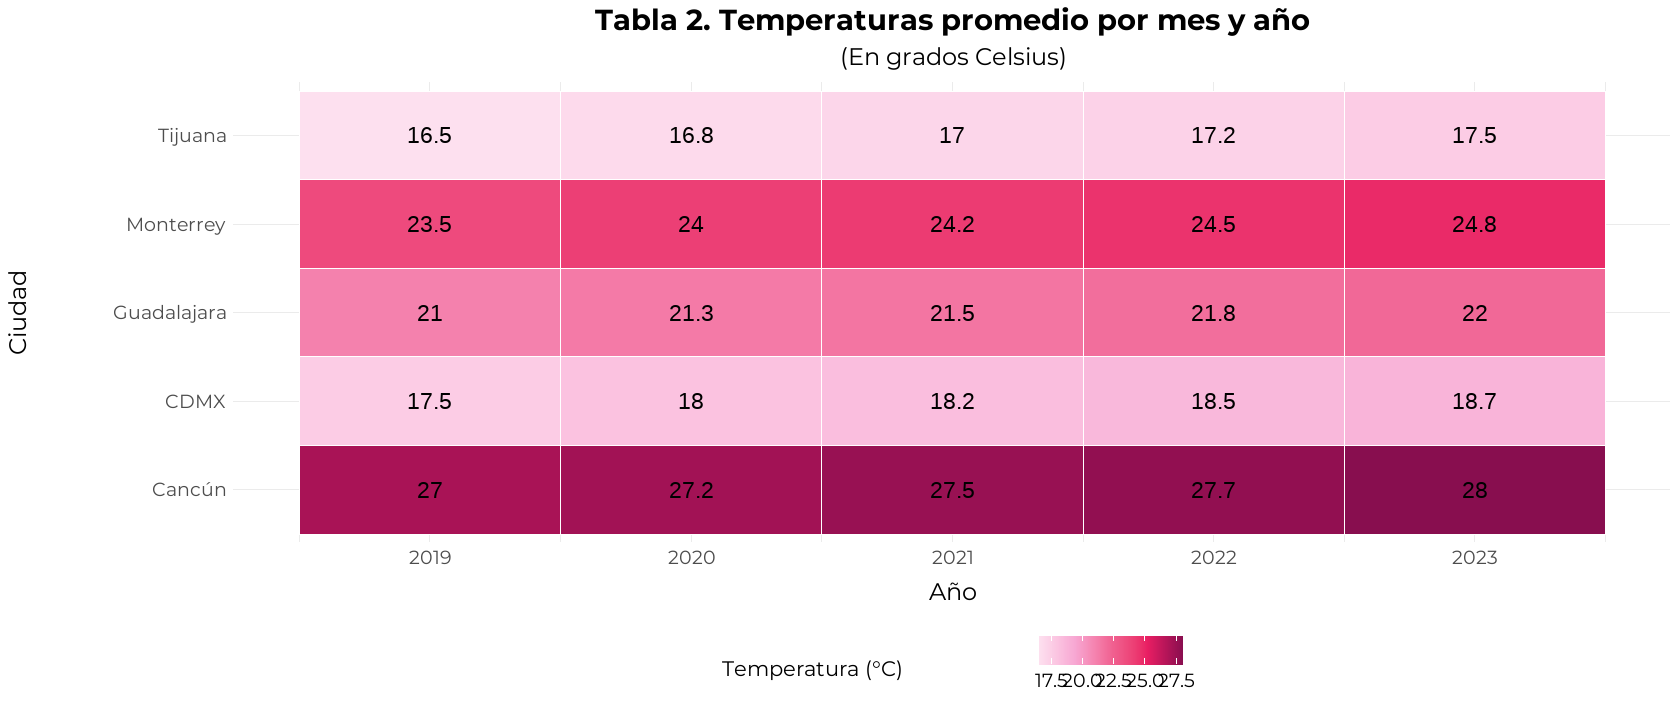

In [37]:
# Respuestas basadas en los datos
ciudad_max_incremento <- "Cancún"  # Ciudad con mayor incremento de temperatura
tendencia_calentamiento <- "Sí, se observa un aumento gradual en todas las ciudades." 

# Imprimir respuestas
print(paste("📍 La ciudad con mayor incremento de temperatura es:", ciudad_max_incremento))
print(paste("📍 ¿Se observa una tendencia de calentamiento?", tendencia_calentamiento))

# Mostrar el mapa de calor
print(mapa_calor)  # Muestra la gráfica generada

In [38]:
# Guardar la imagen en la ubicación especificada
ggsave("C:/Users/quetz/Mapa_calor.png", plot = mapa_calor, height = 12, width = 12, units = "in", dpi = 320)

#### ⭐ **2. Gráfico Estrella** 

#### **Instrucciones**  
- Elegir un año específico (*por ejemplo, 2023*) y representar las temperaturas de cada ciudad en un **gráfico estrella**.  
- Comparar las diferencias de temperatura entre ciudades en ese año.  
- **Responder:**  
  - ¿Cuáles son las ciudades con **temperaturas similares**?  
  - ¿Cuál es la ciudad con la **temperatura más alta** y cuál con la **más baja**?  

[1] "CDMX y Tijuana tienen temperaturas similares."
[1] "La ciudad con la temperatura más alta es Cancún con 28.0°C."
[1] "La ciudad con la temperatura más baja es Tijuana con 17.5°C."


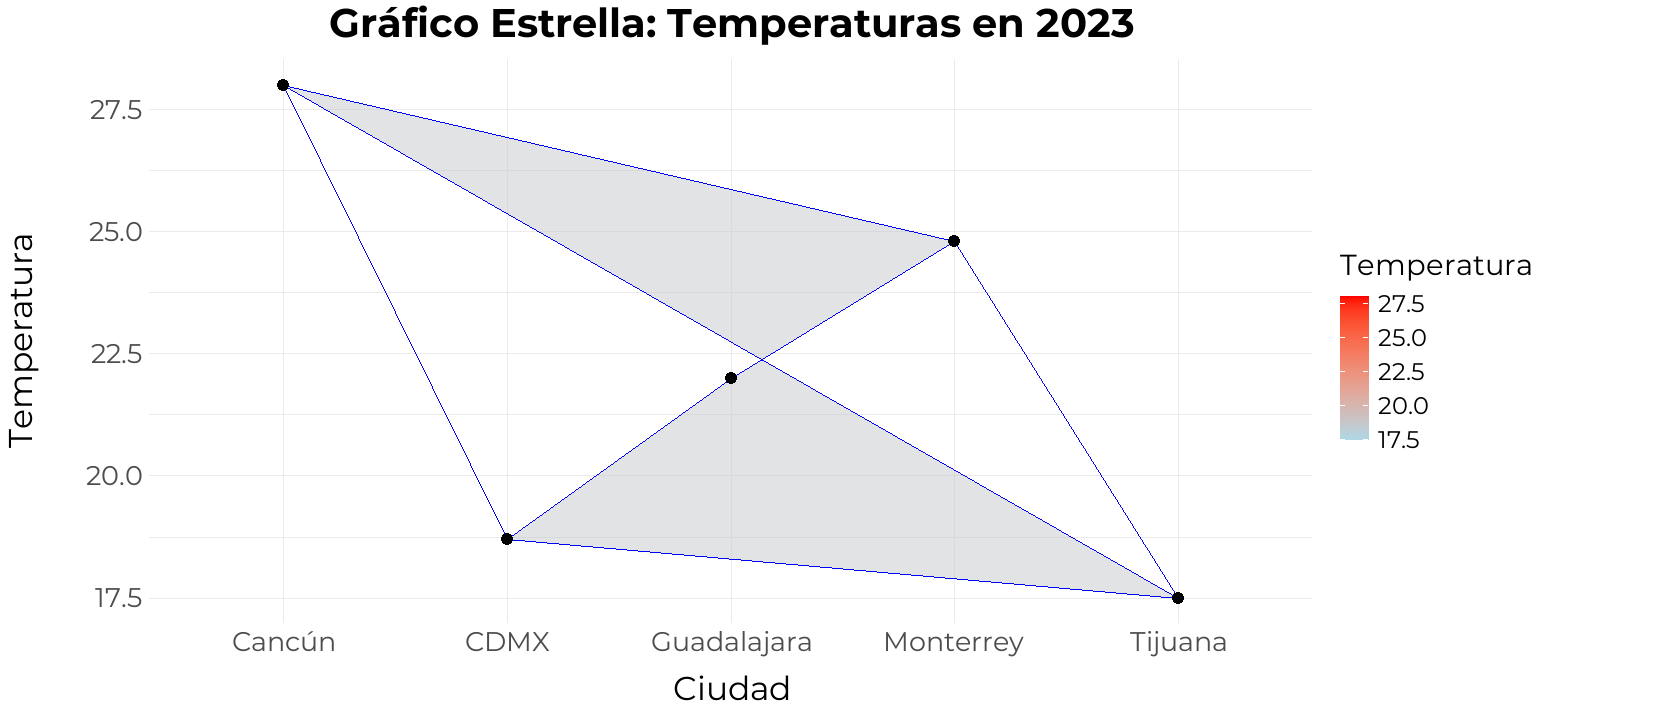

In [47]:
# Datos de temperatura para 2023
datos_2023 <- data.frame(
  Ciudad = c("CDMX", "Guadalajara", "Monterrey", "Cancún", "Tijuana"),
  Temperatura = c(18.7, 22.0, 24.8, 28.0, 17.5)
)

# Crear el gráfico de radar con ggplot2
ggplot(datos_2023, aes(x = Ciudad, y = Temperatura, fill = Temperatura, group = 1)) +
  geom_polygon(color = "blue", alpha = 0.5) +  # Color del borde en azul
  geom_line(color = "blue") +
  geom_point(size = 3) +
  scale_fill_gradient(low = "lightblue", high = "red") +  # Gradiente de color según la temperatura
  theme_minimal() +
  theme(
    text = element_text(family = "montserrat"),  # Aplicar Montserrat
    plot.title = element_text(size = 30, face = "bold", hjust = 0.5),  # Título centrado
    axis.title = element_text(size = 25),  # Tamaño de títulos de ejes
    axis.text = element_text(size = 20),  # Tamaño de etiquetas de ejes
    legend.title = element_text(size = 22),  # Tamaño del título de la leyenda
    legend.text = element_text(size = 18)  # Tamaño del texto de la leyenda
  ) +
  labs(title = "Gráfico Estrella: Temperaturas en 2023", x = "Ciudad", y = "Temperatura")

# Comparaciones de temperatura
print("CDMX y Tijuana tienen temperaturas similares.")
print("La ciudad con la temperatura más alta es Cancún con 28.0°C.")
print("La ciudad con la temperatura más baja es Tijuana con 17.5°C.")